<a href="https://colab.research.google.com/github/Jhonkr/SEATEL2019/blob/master/Heart_Disease_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease UCI

https://www.kaggle.com/ronitf/heart-disease-uci

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
> 14. target: Heart disease (0 = no, 1 = yes)


##DATA

In [0]:
from google.colab import files
files.upload()

In [0]:
import pandas as pd
data = pd.read_csv("file_name_here")

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
#Some ML Algorithms cannot deal with missing data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


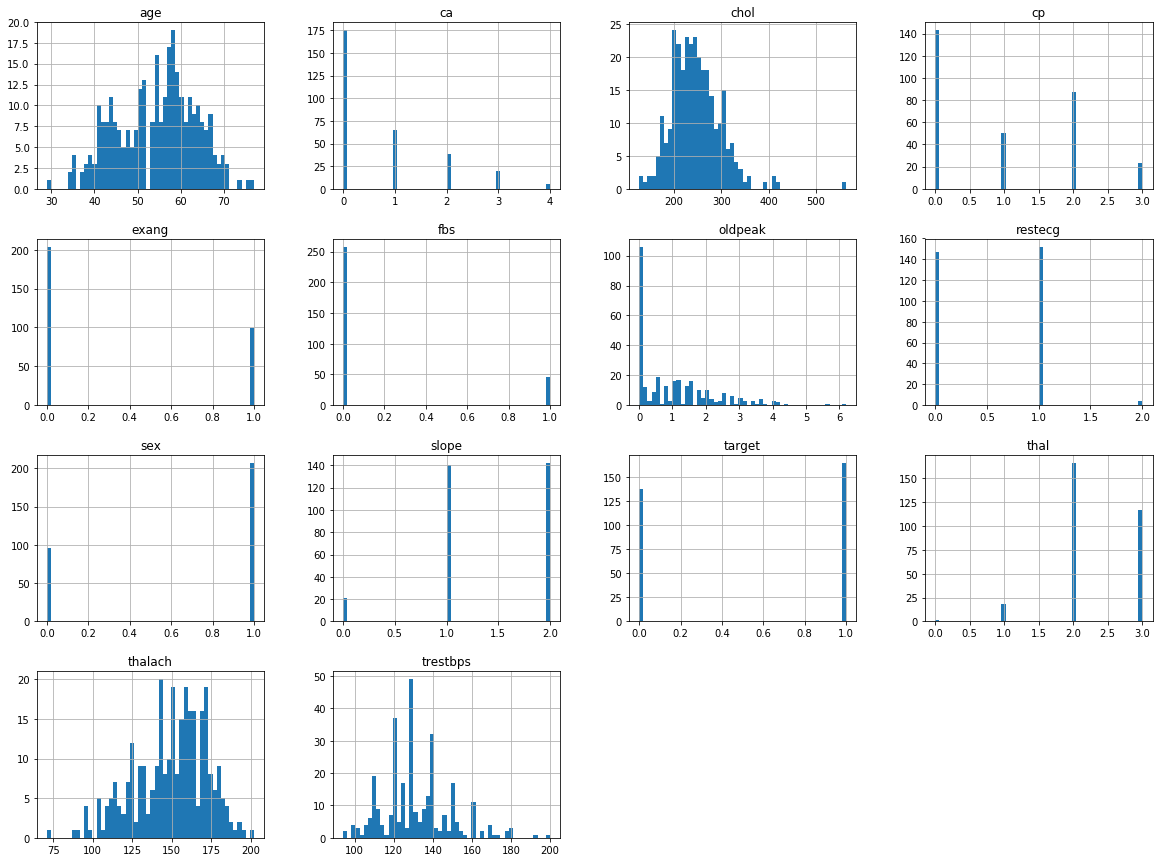

In [0]:
#Histograms

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e5cd50b38>,
      dtype=object)

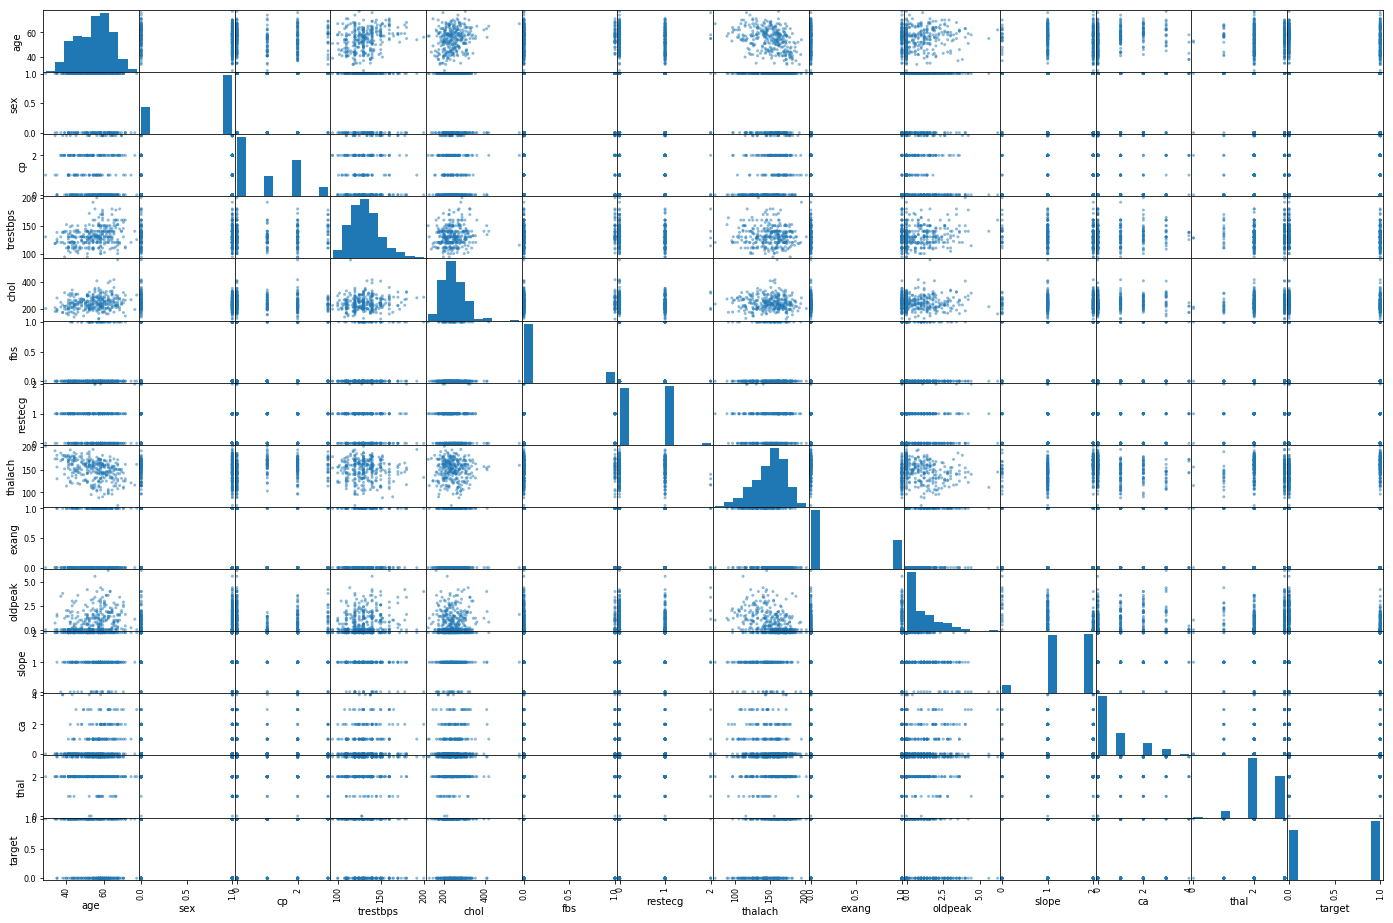

In [0]:
from pandas.tools.plotting import scatter_matrix

attributes = ["age",	"sex",	"cp",	"trestbps",	"chol",	"fbs",	"restecg",
              "thalach",	"exang",	"oldpeak",	"slope",	"ca",	"thal",	"target"]

scatter_matrix(data[attributes], figsize=(24, 16))


## MODEL

In [0]:
#Prepare your data

a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

seed = np.random.seed(seed=13)

X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop('target',axis=1), 
    
    data['target'], test_size=0.20, 
    
    random_state=seed)

In [0]:
X_train.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.628099,0.677686,131.495868,246.892562,0.14876,0.533058,148.913223,0.322314,1.048347,0.719008,...,0.14876,0.289256,0.070248,0.008264,0.057851,0.545455,0.388430,0.074380,0.462810,0.462810
std,9.125344,0.468331,17.059634,53.461632,0.35659,0.516273,23.724838,0.468331,1.116798,1.016243,...,0.35659,0.454357,0.256094,0.090720,0.233946,0.498962,0.488403,0.262932,0.499648,0.499648
min,29.000000,0.000000,94.000000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,208.250000,0.00000,0.000000,132.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,240.500000,0.00000,1.000000,152.500000,0.000000,0.800000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,280.250000,0.00000,1.000000,165.000000,1.000000,1.600000,1.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,4.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
print(Y_train.head())
print(Y_test.head())

80     1
23     1
109    1
259    0
52     1
Name: target, dtype: int64
203    0
30     1
58     1
90     1
119    1
Name: target, dtype: int64


In [0]:
#Find Correlation

corr_matrix = data.corr()
print(corr_matrix["target"].sort_values(ascending=False))
print(corr_matrix["trestbps"].sort_values(ascending=False))
print(corr_matrix["thalach"].sort_values(ascending=False))

target      1.000000
thal_2      0.527334
thalach     0.421741
slope_2     0.394066
cp_2        0.316742
cp_1        0.245879
restecg     0.137230
cp_3        0.086957
thal_0     -0.007293
fbs        -0.028046
slope_0    -0.063554
chol       -0.085239
thal_1     -0.106589
trestbps   -0.144931
age        -0.225439
sex        -0.280937
slope_1    -0.362053
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
thal_3     -0.486112
cp_0       -0.516015
Name: target, dtype: float64
trestbps    1.000000
age         0.279351
oldpeak     0.193216
fbs         0.177531
cp_3        0.151343
chol        0.123174
slope_0     0.122384
thal_3      0.109573
ca          0.101389
thal_1      0.076369
exang       0.067616
slope_1     0.025207
cp_0        0.021447
thal_0     -0.016870
cp_2       -0.045107
thalach    -0.046698
sex        -0.056769
cp_1       -0.081851
slope_2    -0.087472
restecg    -0.114103
thal_2     -0.140712
target     -0.144931
Name: trestbps, dtype: float64
thalach     1.00

In [0]:
# Random Forest

SEED = 13
np.random.seed(SEED)

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

#Returns self predict
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.08 %


In [0]:
Y_prediction

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [0]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_prediction) *100
print("Accuracy: %.2f%%" % acc)

Accuracy: 77.05%


In [0]:
#DecisionTrees

SEED = 13
np.random.seed(SEED)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_test)

acc_dt = accuracy_score(Y_test, dt_predictions) * 100
print("Accuracy: %.2f%%" % acc_dt)

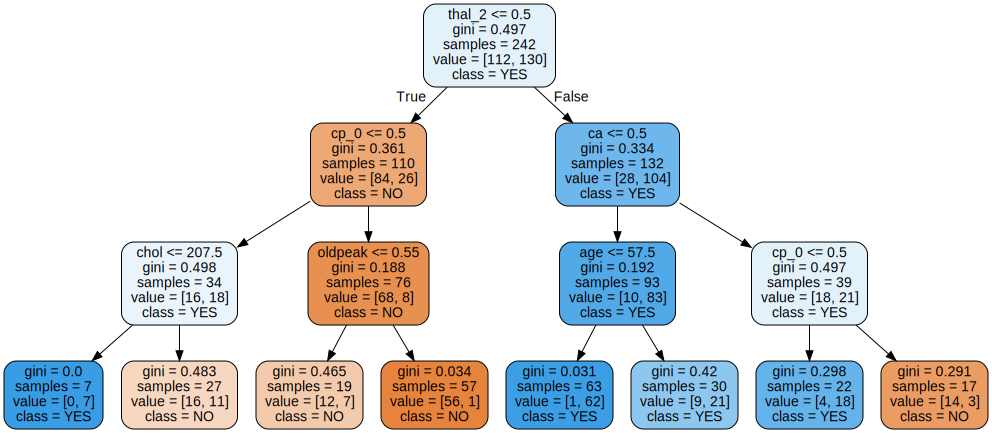

In [0]:
from sklearn.tree import export_graphviz
import graphviz

features = X_train.columns
dot_data = export_graphviz(dt_model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["NO", "YES"])

grafico = graphviz.Source(dot_data)
grafico

You also can see this Kernel at Kaggle with a lot of extra information:

> https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model